<a href="https://colab.research.google.com/github/felixsimard/comp551-p1/blob/main/EDA_Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

Mushroom Dataset 

---

Dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom


In [32]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [33]:
# Import data from csv files

# Mushroom data is not yet split into training/validation + test (one csv file at the moment)
data = pd.read_csv(r'mushrooms.csv')

data

,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE.1,TAPERING,BULBOUS,SMOOTH.1,SMOOTH.2,WHITE.2,WHITE.3,PARTIAL,WHITE.4,ONE,PENDANT,PURPLE,SEVERAL,WOODS
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,CLUSTERED,LEAVES


In [34]:
# Observe columns

data.columns

Index(['EDIBLE', 'CONVEX', 'SMOOTH', 'WHITE', 'BRUISES', 'ALMOND', 'FREE',
       'CROWDED', 'NARROW', 'WHITE.1', 'TAPERING', 'BULBOUS', 'SMOOTH.1',
       'SMOOTH.2', 'WHITE.2', 'WHITE.3', 'PARTIAL', 'WHITE.4', 'ONE',
       'PENDANT', 'PURPLE', 'SEVERAL', 'WOODS'],
      dtype='object')

In [35]:
# Renaming columns to appropriate names from the dataset description
data.rename(columns = {
    "EDIBLE": "Edible",
    "CONVEX": "Cap Shape",
    "SMOOTH": "Cap Surface",
    "WHITE": "Cap Color",
    "BRUISES": "Bruises",
    "ALMOND": "Odor",
    "FREE": "Gill Attachment",
    "CROWDED": "Gill Spacing",
    "NARROW": "Gill Size",
    "WHITE.1": "Gill Color",
    "TAPERING": "Stalk Shape",
    "BULBOUS": "Stalk Root",
    "SMOOTH.1": "Stalk Surface Above Ring",
    "SMOOTH.2": "Stalk Surface Below Ring",
    "WHITE.2": "Stalk Color Above Ring",
    "WHITE.3": "Stalk Color Below Ring",
    "PARTIAL": "Veil Type",
    "WHITE.4": "Veil Color",
    "ONE": "Ring Number",
    "PENDANT": "Ring Type",
    "PURPLE": "Spore Print Color",
    "SEVERAL": "Population",
    "WOODS": "Habitat"
}, inplace=True)

In [36]:
data.columns

Index(['Edible', 'Cap Shape', 'Cap Surface', 'Cap Color', 'Bruises', 'Odor',
       'Gill Attachment', 'Gill Spacing', 'Gill Size', 'Gill Color',
       'Stalk Shape', 'Stalk Root', 'Stalk Surface Above Ring',
       'Stalk Surface Below Ring', 'Stalk Color Above Ring',
       'Stalk Color Below Ring', 'Veil Type', 'Veil Color', 'Ring Number',
       'Ring Type', 'Spore Print Color', 'Population', 'Habitat'],
      dtype='object')

In [37]:
# Data shape
print("Training data shape:", data.shape)

Training data shape: (8416, 23)


In [38]:
# Describe data
data.describe().T

,count,unique,top,freq
Edible,8416,3,EDIBLE,4487
Cap Shape,8415,6,CONVEX,3795
Cap Surface,8415,4,SCALY,3268
Cap Color,8415,10,BROWN,2320
Bruises,8415,2,NO,5040
Odor,8415,9,NONE,3808
Gill Attachment,8415,2,FREE,8199
Gill Spacing,8415,2,CLOSE,6824
Gill Size,8415,2,BROAD,5880
Gill Color,8415,12,BUFF,1728


In [39]:
# Understanding numerical and categorical feature counts
num_data = [c for c in data.columns if data[c].dtype != 'O']
cat_data = [w for w in data.columns if data[w].dtype == 'O']

print("Numerical Feature count:", len(num_data))

Numerical Feature count: 0


In [40]:
print("Categorical Feature count:", len(cat_data))

Categorical Feature count: 23


In [41]:
# Check for null/empty values in data

null_counter = data.isna().sum().sort_values(ascending=False)/len(data)

print("Size of dataset:", data.shape)
null_counter

Size of dataset: (8416, 23)


Habitat                     0.000119
Stalk Shape                 0.000119
Cap Shape                   0.000119
Cap Surface                 0.000119
Cap Color                   0.000119
Bruises                     0.000119
Odor                        0.000119
Gill Attachment             0.000119
Gill Spacing                0.000119
Gill Size                   0.000119
Gill Color                  0.000119
Stalk Root                  0.000119
Population                  0.000119
Stalk Surface Above Ring    0.000119
Stalk Surface Below Ring    0.000119
Stalk Color Above Ring      0.000119
Stalk Color Below Ring      0.000119
Veil Type                   0.000119
Veil Color                  0.000119
Ring Number                 0.000119
Ring Type                   0.000119
Spore Print Color           0.000119
Edible                      0.000000
dtype: float64

In [42]:
# Remove rows with null/empty/Na values
data = data.dropna()

print("Resulting shape of dataset:", data.shape)

Resulting shape of dataset: (8415, 23)


In [43]:
data

,Edible,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,Stalk Shape,Stalk Root,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [44]:
# Check possible values for each columns
for col in data.columns:
  print("Column:", col)
  print(data[col].unique())

Column: Edible
['EDIBLE' 'POISONOUS']
Column: Cap Shape
['CONVEX' 'FLAT' 'BELL' 'SUNKEN' 'KNOBBED' 'CONICAL']
Column: Cap Surface
['SMOOTH' 'FIBROUS' 'SCALY' 'GROOVES']
Column: Cap Color
['WHITE' 'YELLOW' 'BROWN' 'GRAY' 'RED' 'PINK' 'PURPLE' 'GREEN' 'BUFF'
 'CINNAMON']
Column: Bruises
['BRUISES' 'NO']
Column: Odor
['ALMOND' 'ANISE' 'NONE' 'PUNGENT' 'CREOSOTE' 'FOUL' 'FISHY' 'SPICY'
 'MUSTY']
Column: Gill Attachment
['FREE' 'ATTACHED']
Column: Gill Spacing
['CROWDED' 'CLOSE']
Column: Gill Size
['NARROW' 'BROAD']
Column: Gill Color
['WHITE' 'PINK' 'BROWN' 'GRAY' 'BLACK' 'CHOCOLATE' 'PURPLE' 'GREEN' 'RED'
 'BUFF' 'YELLOW' 'ORANGE']
Column: Stalk Shape
['TAPERING' 'ENLARGING']
Column: Stalk Root
['BULBOUS' 'CLUB' 'ROOTED' 'EQUAL' '?']
Column: Stalk Surface Above Ring
['SMOOTH' 'FIBROUS' 'SILKY' 'SCALY']
Column: Stalk Surface Below Ring
['SMOOTH' 'SCALY' 'FIBROUS' 'SILKY']
Column: Stalk Color Above Ring
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'CINNAMON' 'YELLOW' 'ORANGE']
Column: Stalk 

In [45]:
# From above, we notice only the 'Stalk Root' column has this possible "?" value (this is actually stated in the dataset description)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8415 entries, 0 to 8414
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Edible                    8415 non-null   object
 1   Cap Shape                 8415 non-null   object
 2   Cap Surface               8415 non-null   object
 3   Cap Color                 8415 non-null   object
 4   Bruises                   8415 non-null   object
 5   Odor                      8415 non-null   object
 6   Gill Attachment           8415 non-null   object
 7   Gill Spacing              8415 non-null   object
 8   Gill Size                 8415 non-null   object
 9   Gill Color                8415 non-null   object
 10  Stalk Shape               8415 non-null   object
 11  Stalk Root                8415 non-null   object
 12  Stalk Surface Above Ring  8415 non-null   object
 13  Stalk Surface Below Ring  8415 non-null   object
 14  Stalk Color Above Ring  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

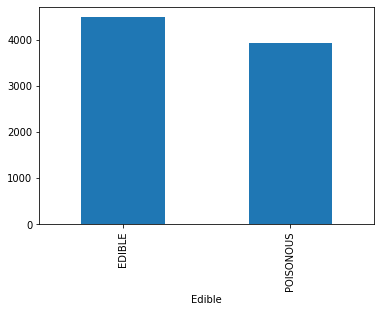

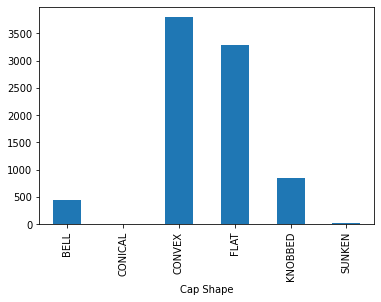

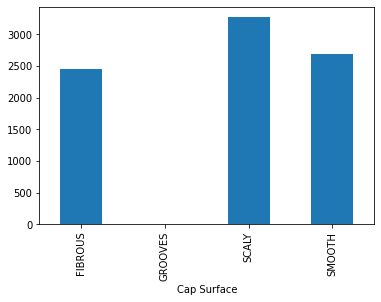

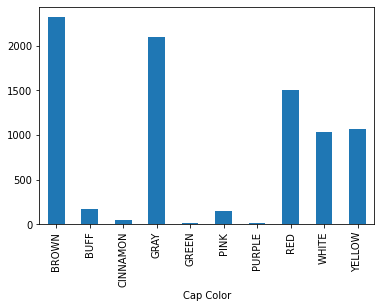

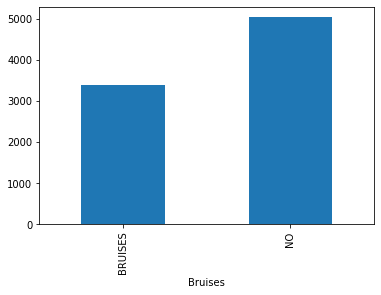

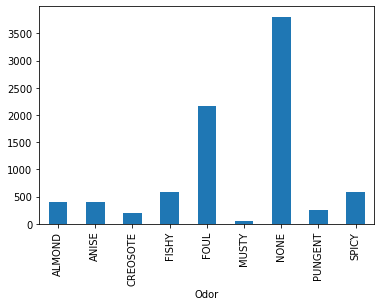

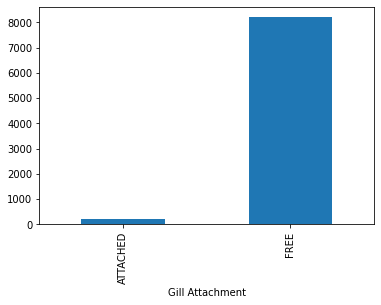

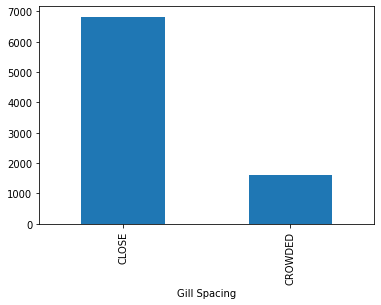

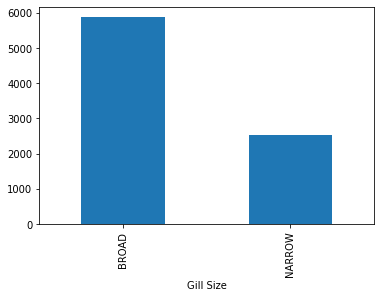

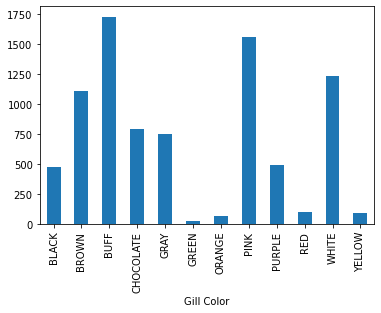

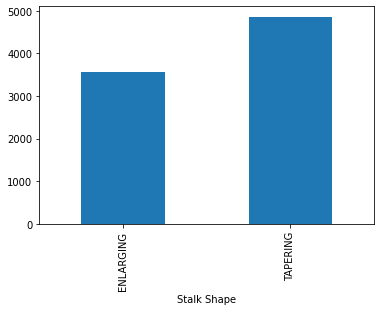

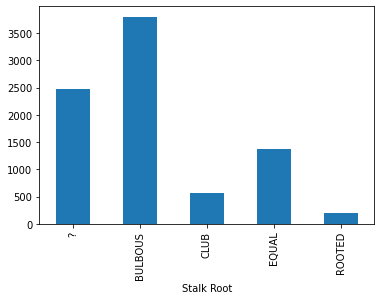

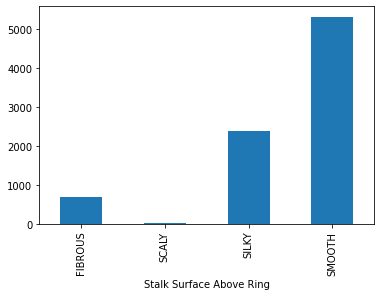

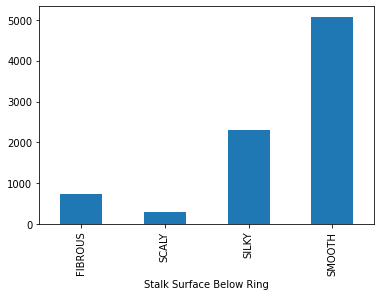

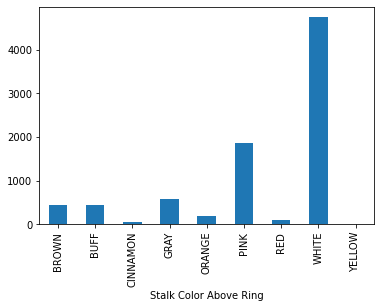

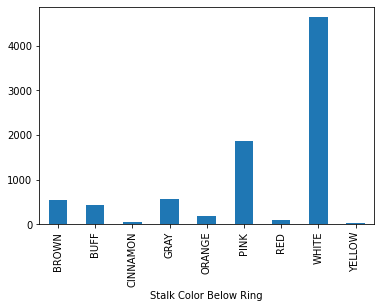

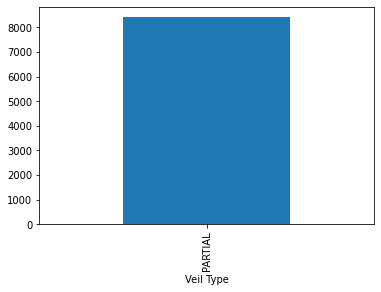

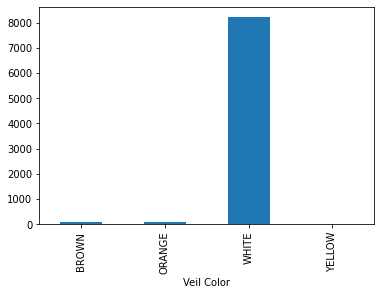

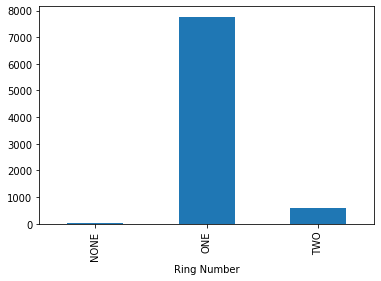

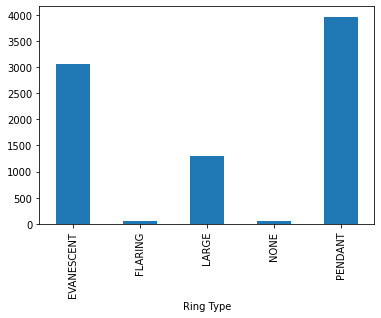

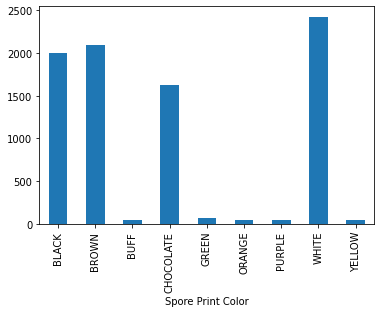

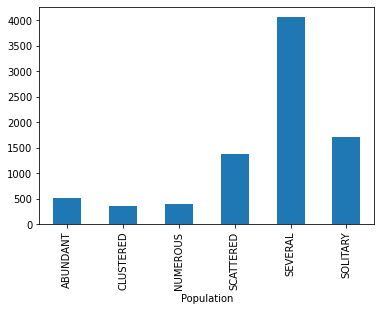

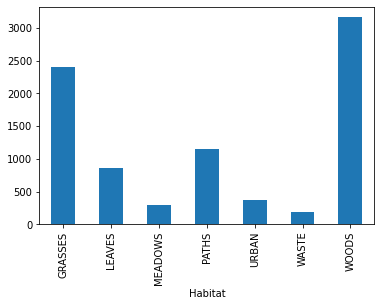

In [47]:
# Distribution plots for each column feature values
for col in data.columns:
    plt.figure()
    data.groupby(by=col).size().plot.bar()

In [48]:
# We notice for the "Stalk Root" feature, we have a large proportion of samples which hold a 
# '?' value, we choose to drop this feature.
data = data.drop(['Stalk Root'], axis=1)
data

,Edible,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,Stalk Shape,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [49]:
# One-Hot encode our categorical features (for this dataset, we happen to only have categorical features)

ohe = OneHotEncoder(sparse=False)

ohe_arr = ohe.fit_transform(data)
ohe_df = pd.DataFrame(data=ohe_arr, columns=ohe.get_feature_names())

print("Shape of One-Hot encoded dataframe:", ohe_df.shape)
ohe_df


Shape of One-Hot encoded dataframe: (8415, 114)


,x0_EDIBLE,x0_POISONOUS,x1_BELL,x1_CONICAL,x1_CONVEX,x1_FLAT,x1_KNOBBED,x1_SUNKEN,x2_FIBROUS,x2_GROOVES,x2_SCALY,x2_SMOOTH,x3_BROWN,x3_BUFF,x3_CINNAMON,x3_GRAY,x3_GREEN,x3_PINK,x3_PURPLE,x3_RED,x3_WHITE,x3_YELLOW,x4_BRUISES,x4_NO,x5_ALMOND,x5_ANISE,x5_CREOSOTE,x5_FISHY,x5_FOUL,x5_MUSTY,x5_NONE,x5_PUNGENT,x5_SPICY,x6_ATTACHED,x6_FREE,x7_CLOSE,x7_CROWDED,x8_BROAD,x8_NARROW,x9_BLACK,...,x14_ORANGE,x14_PINK,x14_RED,x14_WHITE,x14_YELLOW,x15_PARTIAL,x16_BROWN,x16_ORANGE,x16_WHITE,x16_YELLOW,x17_NONE,x17_ONE,x17_TWO,x18_EVANESCENT,x18_FLARING,x18_LARGE,x18_NONE,x18_PENDANT,x19_BLACK,x19_BROWN,x19_BUFF,x19_CHOCOLATE,x19_GREEN,x19_ORANGE,x19_PURPLE,x19_WHITE,x19_YELLOW,x20_ABUNDANT,x20_CLUSTERED,x20_NUMEROUS,x20_SCATTERED,x20_SEVERAL,x20_SOLITARY,x21_GRASSES,x21_LEAVES,x21_MEADOWS,x21_PATHS,x21_URBAN,x21_WASTE,x21_WOODS
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8411,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8413,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [50]:
data

,Edible,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,Stalk Shape,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [51]:
for col in data.columns:
    print ("---- %s ---" % col)
    print (data[col].value_counts())

---- Edible ---
EDIBLE       4487
POISONOUS    3928
Name: Edible, dtype: int64
---- Cap Shape ---
CONVEX     3795
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: Cap Shape, dtype: int64
---- Cap Surface ---
SCALY      3268
SMOOTH     2683
FIBROUS    2460
GROOVES       4
Name: Cap Surface, dtype: int64
---- Cap Color ---
BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1039
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: Cap Color, dtype: int64
---- Bruises ---
NO         5040
BRUISES    3375
Name: Bruises, dtype: int64
---- Odor ---
NONE        3808
FOUL        2160
FISHY        576
SPICY        576
ANISE        400
ALMOND       399
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: Odor, dtype: int64
---- Gill Attachment ---
FREE        8199
ATTACHED     216
Name: Gill Attachment, dtype: int64
---- Gill Spacing ---
CLOSE      6824
CROWDED    1591
Name: Gill Spacing, dt

In [94]:
# We can split the dataset into training/validation (80%) and testing (20%) sets

# CHANGE BELOW TO CUSTOM IMPLEMENTATION !!
from sklearn.model_selection import train_test_split

# **KNN**

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

K = 3

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

In [118]:
# clf = KNeighborsClassifier(n_neighbors=K, weights='uniform')
# train_features = train.loc[:, train.columns != 'x0_EDIBLE']
# train_target = train['x0_EDIBLE']
# X = train.loc[:, train.columns != 'x0_EDIBLE']
# y = train['x0_EDIBLE']
X_df = ohe_df.drop(['x0_EDIBLE', 'x0_POISONOUS'], 1)
print(X_df)
X = np.array(X_df)

y_df = ohe_df[['x0_EDIBLE', 'x0_POISONOUS']]
y = np.array(y_df)

# CHANGE BELOW TO CUSTOM IMPLEMENTATION !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

      x1_BELL  x1_CONICAL  x1_CONVEX  ...  x21_URBAN  x21_WASTE  x21_WOODS
0         0.0         0.0        1.0  ...        0.0        0.0        1.0
1         0.0         0.0        1.0  ...        0.0        0.0        1.0
2         0.0         0.0        1.0  ...        0.0        0.0        1.0
3         0.0         0.0        1.0  ...        0.0        0.0        1.0
4         0.0         0.0        1.0  ...        0.0        0.0        1.0
...       ...         ...        ...  ...        ...        ...        ...
8410      0.0         0.0        0.0  ...        0.0        0.0        0.0
8411      0.0         0.0        0.0  ...        0.0        0.0        0.0
8412      0.0         0.0        0.0  ...        0.0        0.0        0.0
8413      0.0         0.0        0.0  ...        0.0        0.0        0.0
8414      0.0         0.0        0.0  ...        0.0        0.0        0.0

[8415 rows x 112 columns]


In [119]:
# Perform cross-validation for each values of K, fit the model, record metrics for each hyper-parameter value

clf = KNeighborsClassifier(n_neighbors=K, weights=weights)
clf.fit(X_train, y_train)

print("K = ", K)

# Test on model on the test dataset
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_pred, y_test)
print("KNN accuracy:", acc_score)

# Determine our model's score
score = clf.score(X_test, y_test)
print("KNN score:", score)

    


K =  3
KNN accuracy: 1.0
KNN score: 1.0


# **Decision Tree**

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
# Test on model on the test dataset
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_pred, y_test)
print("Decision Tree accuracy:", acc_score)

# Determine our model's score
score = clf.score(X_test, y_test)
print("Decision Tree score:", score)


Decision Tree accuracy: 1.0
Decision Tree score: 1.0


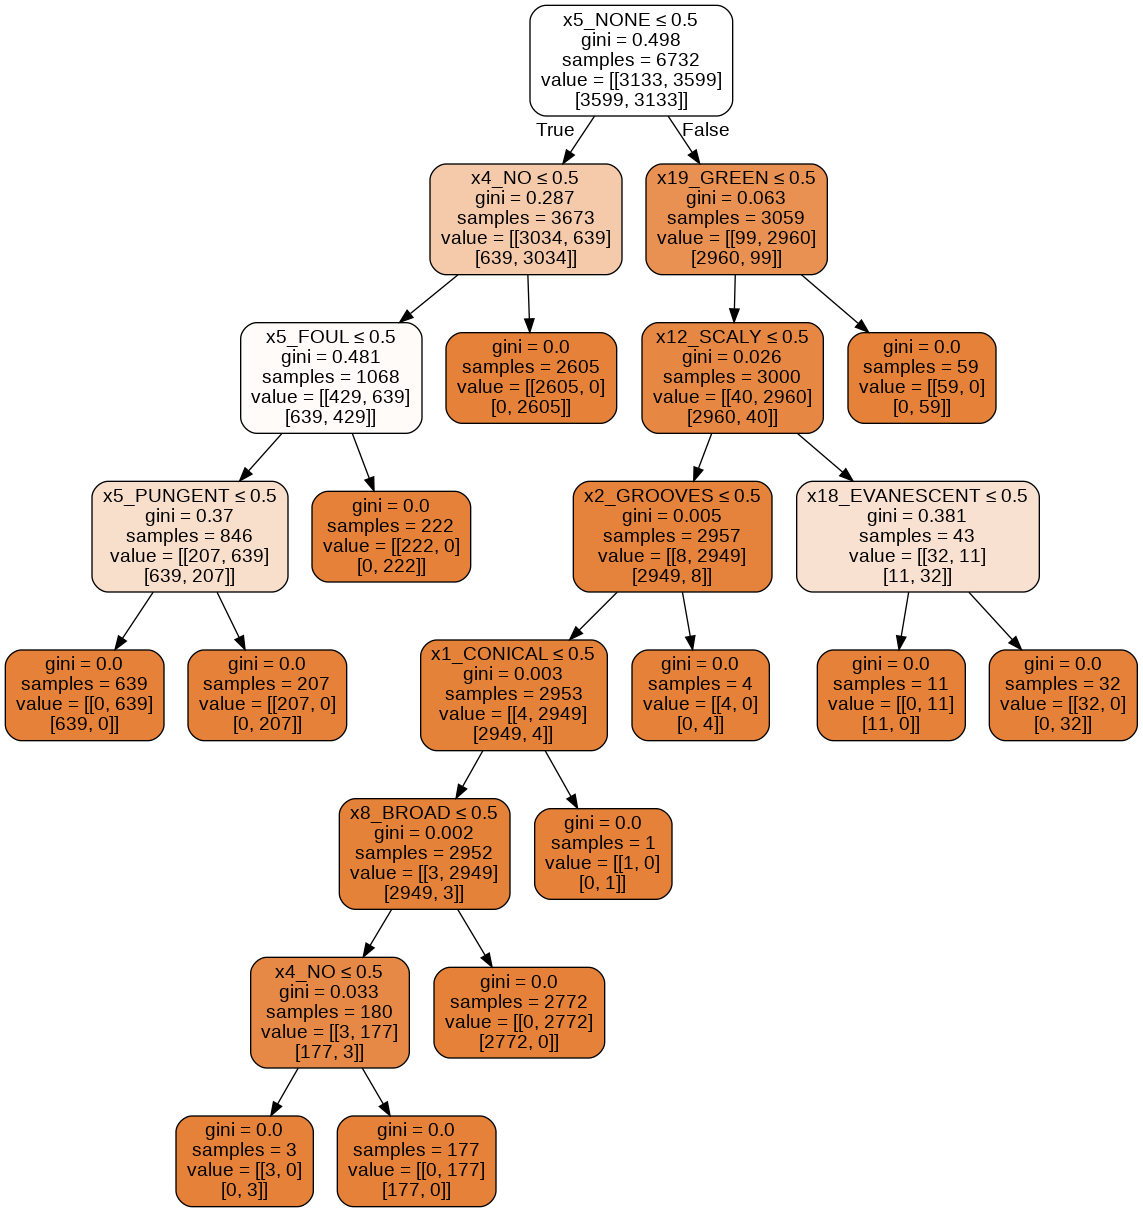

In [116]:
# To plot the Decision Tree, used the following code provided by DataCamp on this webpage:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_df.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())